# Python notebook used to tune the model for the Higgs Boson Challenge

#### EPFL - Machine Learning - Autumn 2019

## 1) Header

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from proj1_helpers import *
from implementations import *
from helpers import *

%load_ext autoreload
%autoreload 2

#### Randomization

In [4]:
seed=374534
np.random.seed(seed)

## 2) Data loading

In [5]:
#PATHS

DATA_TRAIN_PATH = '../../../Data/train.csv'
DATA_TEST_PATH = '../../../Data/test.csv' 


In [6]:
#LOADING
y_train, tx_train, ids_train = load_csv_data(DATA_TRAIN_PATH,sub_sample=False)

y_test, tx_test, ids_test = load_csv_data(DATA_TEST_PATH,sub_sample=False)

## 3) Processing of data
To process the data, we separated the data into four subsets. This separation was made based on the Jet number of the data point. In addition, erroneous measurements (-999) were set to the mean measurement of the feature in question or removed altogether

In [7]:
y_jets_train, x_jets_train, jet_ids_train = data_processing(y_train,tx_train,ids_train,"train");
 
y_jets_test, x_jets_test, jet_ids_test = data_processing(y_test,tx_test,ids_test,"test");

## 4) Functions needed to perform Model Tuning

In [8]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold cross-validation."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation(y, x, k_indices, k, lambda_, degrees, method, initial_w, max_iters, gamma):
    """return the accuracy of given method."""
    y_test=y[k_indices[k,:]]
    x_test=x[k_indices[k,:]]   
    y_train=np.delete(y,k)
    x_train=np.delete(x,k,0)
    
    y_pred_train, y_pred_test = prediction(x_train, y_train, x_test, degrees,lambda_, method, initial_w, max_iters, gamma)
    
    accuracy_train, F1_train = check_accuracy(y_pred_train, y_train)
    accuracy_test, F1_test = check_accuracy(y_pred_test, y_test)
    return accuracy_train, accuracy_test, F1_train, F1_test

def cross_validation_visualization(lambdas, acc_tr, acc_te, f1_tr, f1_te):
    """visualization of the accuracy and the f1 score for the train data and the test data."""
    fig = plt.figure()
    fig.set_size_inches(12,4)
    ax_acc = fig.add_subplot(1, 2, 1)
    ax_f1 = fig.add_subplot(1, 2, 2)
    
    ax_acc.set_xlabel('lambda')
    ax_acc.set_ylabel('accuracy')
    ax_acc.semilogx(lambdas, acc_tr, marker=".", color='b', label='train accuracy')
    ax_acc.semilogx(lambdas, acc_te, marker=".", color='r', label='test accuracy')
    ax_acc.set_title('Accuracy')           
    ax_acc.grid(True)
    ax_acc.legend(loc=2)
    
    ax_f1.set_xlabel('lambda')
    ax_f1.set_ylabel('f1 score')
    ax_f1.semilogx(lambdas, f1_tr, marker=".", color='b', label='train f1 score')
    ax_f1.semilogx(lambdas, f1_te, marker=".", color='r', label='test f1 score')
    ax_f1.set_title('F1 score')           
    ax_f1.grid(True)
    ax_f1.legend(loc=2)
    
    fig.savefig('cross_validation')


def cross_validation_demo(y, x, k_fold, lambdas, degrees,seed=1, method="RLR", initial_w=None,
               max_iters=10000, gamma=1e-10):
    """to do"""
    k_indices = build_k_indices(y, k_fold,seed)
    acc_tr = []
    acc_te = []
    f1_tr = []
    f1_te = []
    for lambda_ in lambdas:
        acc_tr_lambda=0;
        acc_te_lambda=0;
        f1_tr_lambda=0;
        f1_te_lambda=0;
        for k in range(k_fold):
            accuracy_train, accuracy_test, f1_train, f1_test = cross_validation(y, x, k_indices, k, lambda_, degrees, method, initial_w, max_iters, gamma)
            
            acc_tr_lambda += accuracy_train/k_fold
            acc_te_lambda += accuracy_test/k_fold
            f1_tr_lambda += f1_train/k_fold
            f1_te_lambda += f1_test/k_fold
            
        acc_tr.append(acc_tr_lambda)
        acc_te.append(acc_te_lambda)
        f1_tr.append(f1_tr_lambda)
        f1_te.append(f1_te_lambda)
       
    cross_validation_visualization(lambdas, acc_tr, acc_te, f1_tr, f1_te)



## 5) Test of each Method from implementations.py

In [9]:
# Using x_train and y_train as data

# Parameters

from helpers import *

degree = 3
phi_tr = build_poly(tx_train,degree)
initial_w = np.zeros(phi_tr.shape[1])
max_iters = 1000
gamma = 1e-30
lambda_ = 1e-3


#least_squares_GD(y_train, tx_train, initial_w, max_iters, gamma)
#least_squares_SGD(y_train, tx_train, initial_w, max_iters, gamma)
#least_squares(y_train, tx_train)
#ridge_regression(y_train, tx_train, lambda_)
#logistic_regression(y_train, tx_train, initial_w, max_iters, gamma)
#reg_logistic_regression(y_train, tx_train, lambda_, initial_w, max_iters, gamma)


## 6) Model Tuning

JET NUMBER 0

THE DEGREE IS  9
THE JET NUMBER IS  0
Lambda=1e-6.000:
 The train data accuracy of the model is 0.5638962286812395 
The train data f1 score of the model is 0.3591410501544344 
Lambda=1e-6.000:
 The train data accuracy of the model is 0.8087817279205701 
The train data f1 score of the model is 0.601638899893659 
Lambda=1e-6.000:
 The train data accuracy of the model is 0.8190707822884138 
The train data f1 score of the model is 0.6175232211243467 
Lambda=1e-6.000:
 The train data accuracy of the model is 0.7375590519657298 
The train data f1 score of the model is 0.5421272285958755 
Lambda=1e-5.000:
 The train data accuracy of the model is 0.8212226759548402 
The train data f1 score of the model is 0.6212307561813479 
Lambda=1e-5.000:
 The train data accuracy of the model is 0.8245656177436144 
The train data f1 score of the model is 0.6245716244002743 
Lambda=1e-5.000:
 The train data accuracy of the model is 0.8402494194891504 
The train data f1 score of the model is 0.650246521310397

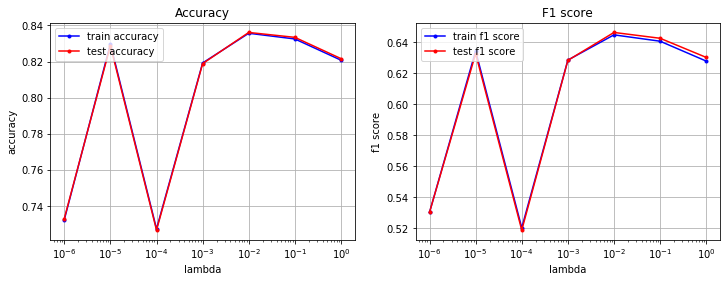

In [10]:
from helpers import *

lambdas = np.logspace(-6,0,7)
k_fold = 4
degrees = [9]
seed = 3495
method = "RR"

i=0
for degree in degrees:
            print("THE DEGREE IS ", degree)
            print("THE JET NUMBER IS ",i)
            cross_validation_demo(y_jets_train[i], x_jets_train[i], k_fold, lambdas, degree,seed, method)

JET NUMBER 1

THE DEGREE IS  8
THE JET NUMBER IS  1
Lambda=1e-12.000:
 The train data accuracy of the model is 0.800033529783475 
The train data f1 score of the model is 0.7085886111633152 
Lambda=1e-12.000:
 The train data accuracy of the model is 0.8000722179951769 
The train data f1 score of the model is 0.7086285639107637 
Lambda=1e-11.000:
 The train data accuracy of the model is 0.8000206337129077 
The train data f1 score of the model is 0.7085643406190681 
Lambda=1e-11.000:
 The train data accuracy of the model is 0.8000722179951769 
The train data f1 score of the model is 0.7086285639107637 
Lambda=1e-10.000:
 The train data accuracy of the model is 0.8000722179951769 
The train data f1 score of the model is 0.7086285639107637 
Lambda=1e-10.000:
 The train data accuracy of the model is 0.8000593219246096 
The train data f1 score of the model is 0.7086152458276951 
Lambda=1e-9.000:
 The train data accuracy of the model is 0.8001366983480134 
The train data f1 score of the model is 0.708706112

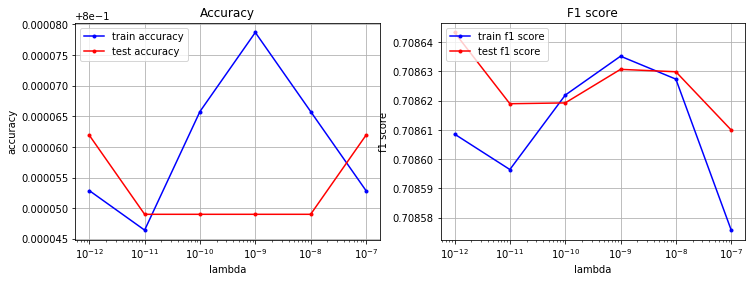

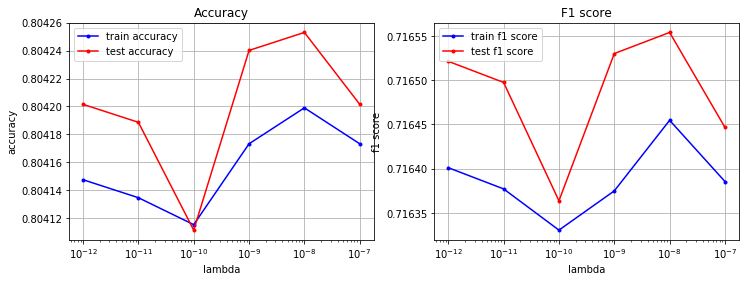

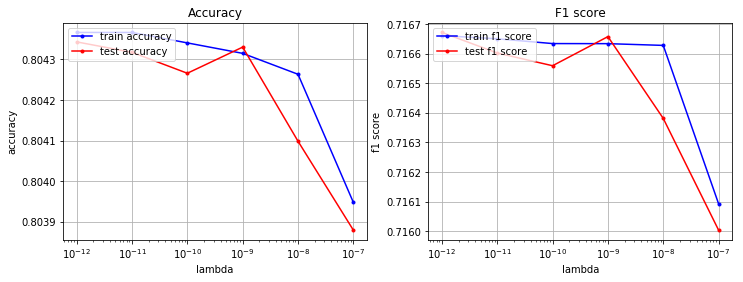

In [13]:
lambdas = np.logspace(-12,-7,6)
k_fold = 4
degrees = [10]
seed = 3495
method = "RR"

i=1
for degree in degrees:
            print("THE DEGREE IS ", degree)
            print("THE JET NUMBER IS ",i)
            cross_validation_demo(y_jets_train[i], x_jets_train[i], k_fold, lambdas, degree,seed, method)

JET NUMBER 2

THE DEGREE IS  8
THE JET NUMBER IS  2
Lambda=1e-15.000:
 The train data accuracy of the model is 0.8321092540394617 
The train data f1 score of the model is 0.8384151001069845 
Lambda=1e-15.000:
 The train data accuracy of the model is 0.8321291039739569 
The train data f1 score of the model is 0.8384187699421081 
Lambda=1e-10.000:
 The train data accuracy of the model is 0.8318909047600143 
The train data f1 score of the model is 0.8382142243108488 
Lambda=1e-10.000:
 The train data accuracy of the model is 0.8318909047600143 
The train data f1 score of the model is 0.8382142243108488 
Lambda=1e-5.000:
 The train data accuracy of the model is 0.8317916550875382 
The train data f1 score of the model is 0.8381712626995647 
Lambda=1e-5.000:
 The train data accuracy of the model is 0.8316924054150622 
The train data f1 score of the model is 0.8380788694738852 
Lambda=1e0.000:
 The train data accuracy of the model is 0.8195640954384851 
The train data f1 score of the model is 0.82718631178

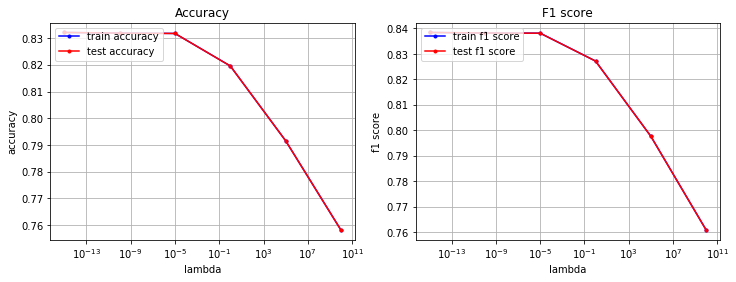

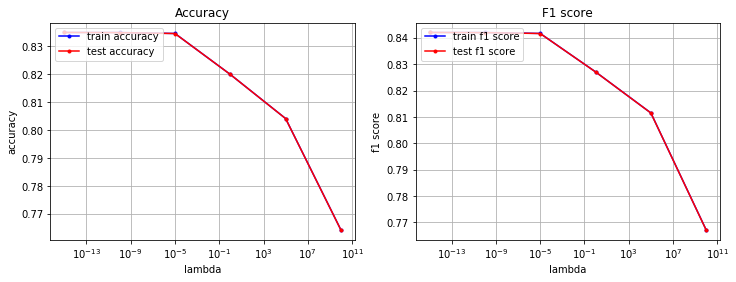

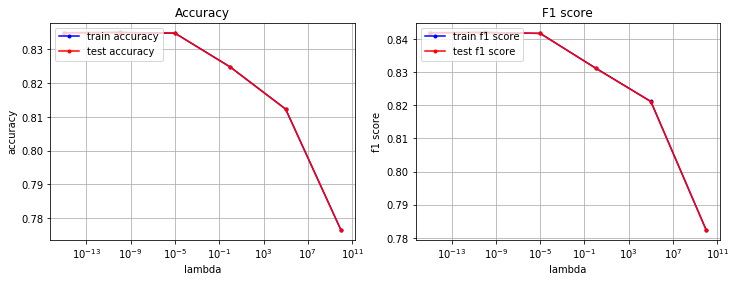

In [14]:
lambdas = np.logspace(-15,10,6)
k_fold = 2
degrees = [8,9,10]
seed = 3495
method = "RR"

i=2
for degree in degrees:
            print("THE DEGREE IS ", degree)
            print("THE JET NUMBER IS ",i)
            cross_validation_demo(y_jets_train[i], x_jets_train[i], k_fold, lambdas, degree,seed, method)

JET NUMBER 3

THE DEGREE IS  8
THE JET NUMBER IS  3
Lambda=1e-12.000:
 The train data accuracy of the model is 0.8264224157379416 
The train data f1 score of the model is 0.6829308497486195 
Lambda=1e-12.000:
 The train data accuracy of the model is 0.8264224157379416 
The train data f1 score of the model is 0.6830353464612342 
Lambda=1e-11.000:
 The train data accuracy of the model is 0.8263772954924875 
The train data f1 score of the model is 0.6827699917559769 
Lambda=1e-11.000:
 The train data accuracy of the model is 0.8264224157379416 
The train data f1 score of the model is 0.6829308497486195 
Lambda=1e-10.000:
 The train data accuracy of the model is 0.8263772954924875 
The train data f1 score of the model is 0.6828222881635344 
Lambda=1e-10.000:
 The train data accuracy of the model is 0.8263772954924875 
The train data f1 score of the model is 0.6828745673314652 
Lambda=1e-9.000:
 The train data accuracy of the model is 0.8263321752470334 
The train data f1 score of the model is 0.68276601

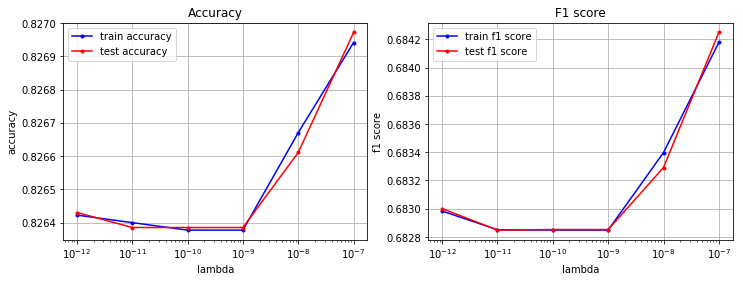

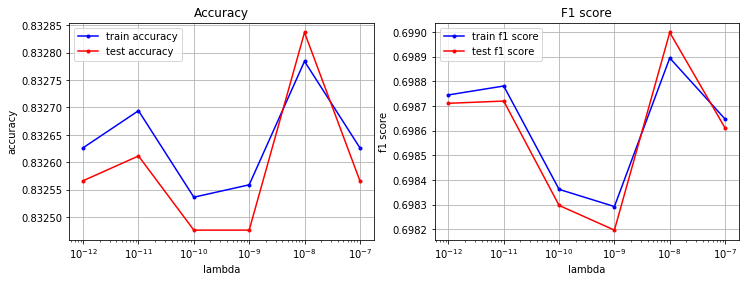

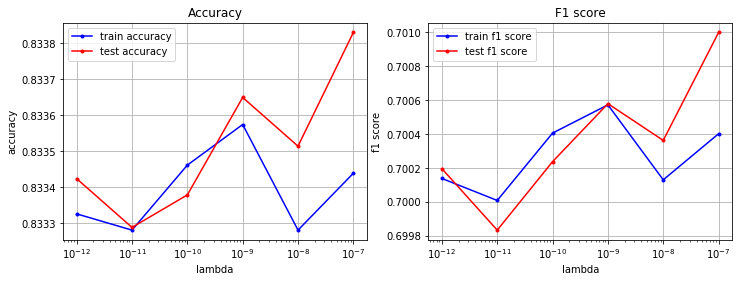

In [15]:
lambdas = np.logspace(-12,-7,6)
k_fold = 2
degrees = [8,9,10]
seed = 3495
method = "RR"

i=3
for degree in degrees:
            print("THE DEGREE IS ", degree)
            print("THE JET NUMBER IS ",i)
            cross_validation_demo(y_jets_train[i], x_jets_train[i], k_fold, lambdas, degree,seed, method)

## 7) Prediction of Test Data

In [13]:
y_pred = []
ids = []

lambdas = [1e-3,1e-9,1e-12,1e-9]
degrees = [9,10,9,10]

for i in range(4):
    
    tx_train = build_poly(x_jets_train[i],degrees[i])
    tx_test = build_poly(x_jets_test[i],degrees[i])
    
    weights, loss = ridge_regression(y_jets_train[i],tx_train,lambdas[i])
    ids.extend(jet_ids_test[i])
    y_pred.extend(predict_labels(weights, tx_test))

create_csv_submission(ids,y_pred,'FinalResults.csv')
print("Successful")